In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [2]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ MB


In [4]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [5]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [6]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  396307
Total transactions in test dataset:  94206


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

## Практика

In [7]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [8]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])
# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [9]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    ) 
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()

# transaction_by_day_count(raw_df)

### Агрегирование с помощью Pandas и обучение базовой модели

In [10]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [11]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

In [12]:
df_train_mcc.shape

(4000, 664)

In [13]:
transactions_train.shape

(396307, 10)

In [14]:
df_train_mcc.shape

(4000, 664)

In [15]:
len(transactions_train.MCC.unique())*2

664

In [16]:
transactions_train.trx_category.value_counts()

POS               336699
DEPOSIT            17270
WD_ATM_ROS         15446
WD_ATM_PARTNER      7963
WD_ATM_OTHER        5724
C2C_IN              5624
C2C_OUT             4523
BACK_TRX            2123
CAT                  911
CASH_ADV              24
Name: trx_category, dtype: int64

In [17]:
df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

In [18]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

df_train = pd.merge(
    df_train_mcc,
    df_train_trx_category,
    left_index=True,
    right_index=True,
)

In [19]:
df_train.head()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,trx_category_sum_BACK_TRX,trx_category_sum_C2C_IN,trx_category_sum_C2C_OUT,trx_category_sum_CASH_ADV,trx_category_sum_CAT,trx_category_sum_DEPOSIT,trx_category_sum_POS,trx_category_sum_WD_ATM_OTHER,trx_category_sum_WD_ATM_PARTNER,trx_category_sum_WD_ATM_ROS
cl_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13990.0,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,296950.0,0.00,0.0,0.00,5000.0,12365.09,0.0,100000.0,435000.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,182000.0,245747.14,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,152700.0,0.00,0.0,0.00,0.0,258990.17,0.0,0.0,37000.0


In [20]:
df_targets = raw_df[['cl_id', 'target_flag']].drop_duplicates().copy()
df_targets.index = df_targets['cl_id']
df_targets = df_targets.drop('cl_id', axis=1)
df_targets.head()

,target_flag
cl_id,
0,0
1,0
5,1
9,0
10,0


In [21]:
df_train = pd.merge(
    df_train,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

In [22]:
df_train.head()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,trx_category_sum_C2C_IN,trx_category_sum_C2C_OUT,trx_category_sum_CASH_ADV,trx_category_sum_CAT,trx_category_sum_DEPOSIT,trx_category_sum_POS,trx_category_sum_WD_ATM_OTHER,trx_category_sum_WD_ATM_PARTNER,trx_category_sum_WD_ATM_ROS,target_flag
cl_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,296950.0,0.00,0.0,0.00,5000.0,12365.09,0.0,100000.0,435000.0,0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0,0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,182000.0,245747.14,0.0,0.0,0.0,0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,152700.0,0.00,0.0,0.00,0.0,258990.17,0.0,0.0,37000.0,1


In [23]:
df_train.shape

(4000, 685)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()
X_train = df_train.drop(['target_flag'], axis=1)
y_train = df_train['target_flag']

In [26]:
clf.fit(X=X_train, y=y_train)

/Users/maxim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maxim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

In [28]:
y_train_predict = clf.predict_proba(X_train)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)

print("Train: ", roc_auc_train)

Train:  0.77


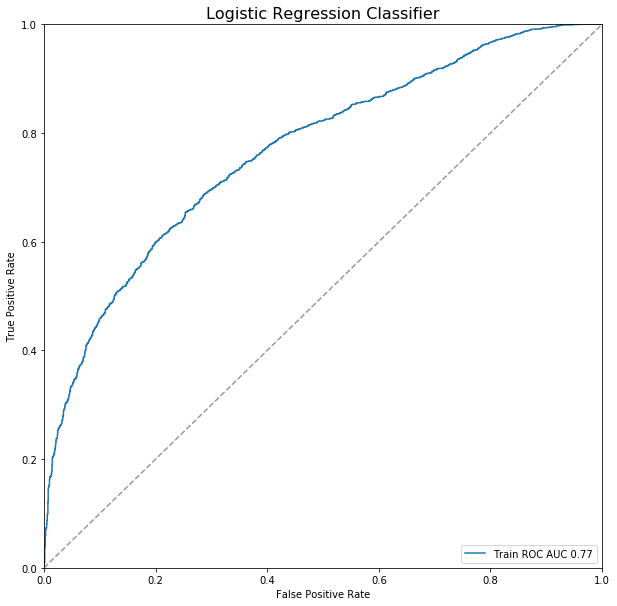

In [29]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

## Пример загрузки описаний MCC кодов

In [30]:
from bs4 import BeautifulSoup as bs
# import requests
import urllib
from urllib.request import urlopen, Request

In [31]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'
}
reg_url = 'https://mcc-codes.ru/code'
req = Request(url=reg_url, headers=headers)

In [32]:
check = bs(urlopen(req).read())

In [33]:
#check.find('body')

In [34]:
list_of_mcc_tags = check.find_all('tr')[1:]

In [35]:
list_of_mcc_tags[0].text.split('\n')

['', '0742', 'Ветеринарные услуги', 'Контрактные услуги', '31.01.18', '']

In [36]:
mcc_names_list = list(
    map(
        lambda x: (x.text.split('\n')[1], x.text.split('\n')[2]), list_of_mcc_tags
    )
)

In [37]:
mcc_title = pd.DataFrame(mcc_names_list)
mcc_title.head()

,0,1
0,0742,Ветеринарные услуги
1,0763,Сельскохозяйственные кооперативы
2,0780,Услуги садоводства и ландшафтного дизайна
3,1520,Генеральные подрядчики – жилое и коммерческое ...
4,1711,"Генеральные подрядчики по вентиляции, теплосна..."


In [38]:
mcc_title_correct = mcc_title.rename(columns={0:'MCC', 1: 'Name'})
mcc_title_correct.head(1)

,MCC,Name
0,0742,Ветеринарные услуги


## Выполнение домашнего задания

*Обязательная часть: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи*

In [39]:
transactions_train.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
109,01/06/2017,5,5944,NaN,810,18JUN17:00:00:00,3719.00,POS,1,326211.75
110,01/06/2017,5,6012,NaN,810,14JUN17:00:00:00,10000.00,C2C_OUT,1,326211.75
111,01/04/2017,5,5621,NaN,810,06APR17:00:00:00,1399.00,POS,1,326211.75
112,01/06/2017,5,5691,NaN,810,17JUN17:00:00:00,3190.00,POS,1,326211.75
113,01/04/2017,5,5499,NaN,810,25APR17:00:00:00,1387.61,POS,1,326211.75


In [40]:
# Посмотрим какая валюта встречается наиболее часто
transactions_train['currency'].value_counts().head(3)
# 810 - RUB
# 978 - EU
# 840 - USD

810    386229
978      4495
840      1443
Name: currency, dtype: int64

In [41]:
# посмотрим процентное содержание этих валют

In [42]:
rub = round(transactions_train['currency'][transactions_train['currency'] == 810].count()
          /len(transactions_train['currency'])*100,2)
eu = round(transactions_train['currency'][transactions_train['currency'] == 978].count()
          /len(transactions_train['currency'])*100,2)
usd = round(transactions_train['currency'][transactions_train['currency'] == 840].count()
          /len(transactions_train['currency'])*100,2)
print ('Доля RUB в процентах = {0},Доля EU в процентах = {1},Доля USD в процентах = {2}'.format(rub,eu,usd))

Доля RUB в процентах = 97.46,Доля EU в процентах = 1.13,Доля USD в процентах = 0.36


In [43]:
# Посмотрим общую сумму/среднее транзакций по этим валютам для пользователей

In [89]:
top_3_currency = transactions_train[(transactions_train['currency'] == 810) | (transactions_train['currency'] == 978) \
| (transactions_train['currency'] == 840)]
#top_3_currency_df = top_3_currency[['cl_id','currency','amount']].groupby(['cl_id','currency']).sum()
#top_3_currency_df.unstack(fill_value=0).head(5)

In [45]:
df_train_currency = pd.merge(
    get_aggregated_df(top_3_currency, agg_type='mean', col_to_groupby='currency'),
    get_aggregated_df(top_3_currency, agg_type='sum', col_to_groupby='currency'),
    left_index=True,
    right_index=True,
)

In [46]:
# объединим df_train_currency с target_flag
df_train_currency = pd.merge(
    df_train_currency,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

In [47]:
# Посмотрим channel_type
transactions_train['channel_type'].value_counts(dropna = False)

type1    241382
type2    141588
type5      4295
type4      3924
type3      2611
NaN        2507
Name: channel_type, dtype: int64

In [48]:
# вместо NaN будем использовать unknown для удобства
transactions_train['channel_type'].fillna('unknown', inplace=True)

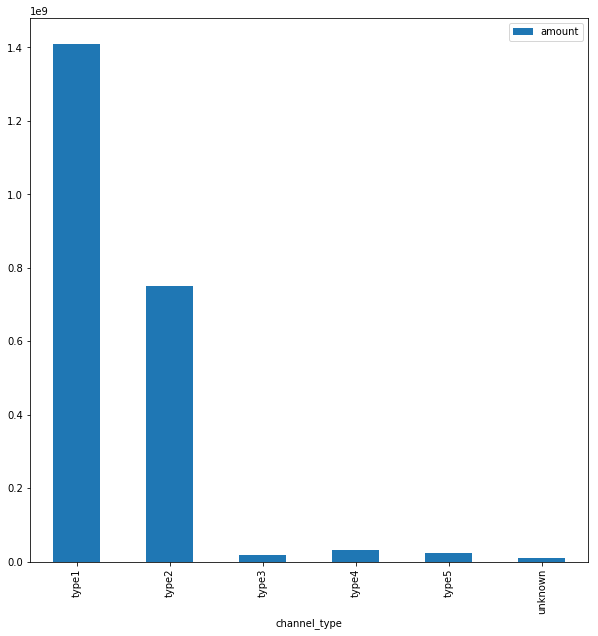

In [49]:
# посмотрим сумму трат в зависимости от уникальных каналов привлечения клиента
channel_amount = transactions_train[['channel_type','amount']].groupby('channel_type').sum()
channel_amount.plot(kind = 'bar')
# Существенное отличие type1, type2 по кол-ву трат в отличие от других каналов 

In [50]:
# посмотрим на категории trx_category
transactions_train['trx_category'].value_counts()

POS               336699
DEPOSIT            17270
WD_ATM_ROS         15446
WD_ATM_PARTNER      7963
WD_ATM_OTHER        5724
C2C_IN              5624
C2C_OUT             4523
BACK_TRX            2123
CAT                  911
CASH_ADV              24
Name: trx_category, dtype: int64

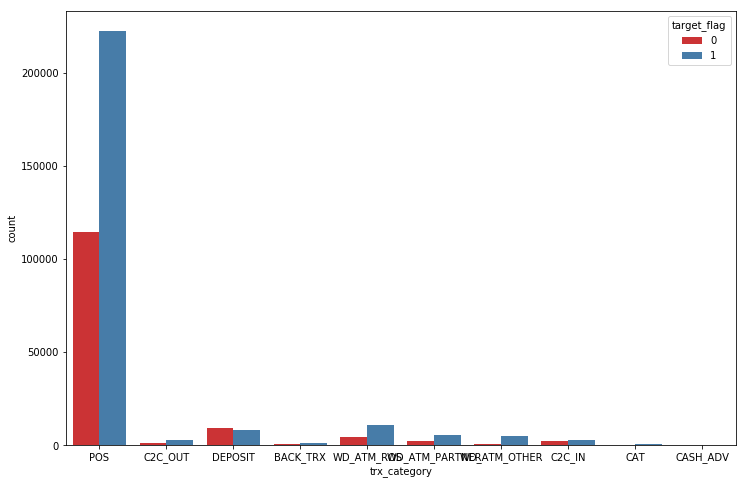

In [51]:
# бОльшая часть приходится на POS. посмотрим на график операций 
plt.figure(figsize = (12,8))
sns.countplot(x = 'trx_category', hue='target_flag', data=transactions_train, palette="Set1")

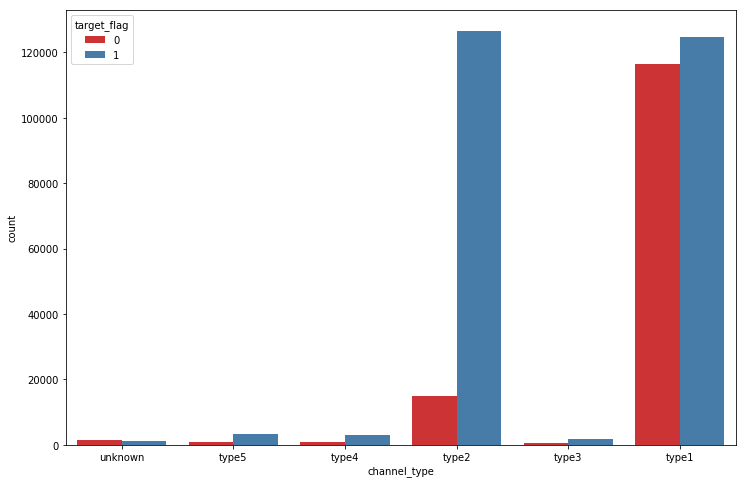

In [52]:
# Посмотрим на channel_type и target_flag вместе
plt.figure(figsize = (12,8))
sns.countplot(x = 'channel_type', hue='target_flag', data=transactions_train, palette="Set1")
# количесвто людей ,оставшихся после льготного периода ,сущесвтвенно больше в type_2

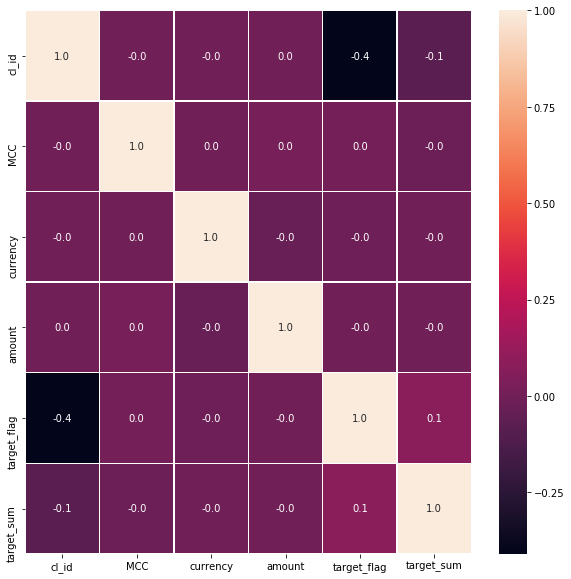

In [53]:
# Посмотрим на коррелицию признаков
corr = transactions_train.corr()
sns.heatmap(corr, annot=True, fmt=".1f", 
            linewidths=0.5);
# корреляции отсутствуют

In [54]:
# выделим самые популярные MCC (top 10)
transactions_train['MCC'].value_counts().head(10).index.tolist()

[5411, 6011, 5814, 5812, 5499, 5541, 5912, 5999, 6012, 5921]

In [55]:
mcc_title_correct['MCC'] = mcc_title_correct.MCC.astype('int64')

In [56]:
mcc_name_df = transactions_train.merge(mcc_title_correct,how = 'left',on='MCC')

In [57]:
# MCC (top 10) с названием
mcc_name_df[['MCC','Name','cl_id']].groupby('Name').count().sort_values('MCC',ascending = False).\
head(10).reset_index()[['Name']]

,Name
0,"Бакалейные магазины, супермаркеты"
1,Финансовые учреждения – снятие наличности авто...
2,Фастфуд
3,"Места общественного питания, рестораны"
4,Различные продовольственные магазины - нигде б...
5,"Станции техобслуживания, с дополнительными усл..."
6,Аптеки
7,Различные магазины и специальные розничные маг...
8,Финансовые учреждения – торговля и услуги
9,Магазины с продажей спиртных напитков навынос


In [58]:
# Посмотрим на долевое распределение МСС от суммы amount процентах
(mcc_name_df[['MCC', 'Name','amount']].groupby(['MCC','Name']).sum()
 /mcc_name_df['amount'].sum()*100
).sort_values('amount', ascending=False).head()
# Снятие денег - фаворит

,,amount
MCC,Name,
6011,Финансовые учреждения – снятие наличности автоматически,53.994978
6012,Финансовые учреждения – торговля и услуги,6.843822
5411,"Бакалейные магазины, супермаркеты",4.712172
4829,Денежные переводы,3.109010
7011,Отели и мотели - нигде более не классифицированные,2.413847


*Активность клиентов по дням недели/времени*

In [59]:
transaction_by_day_count(transactions_train).head()

day_of_transaction,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
1,9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
2,10,74.0,35.0,62.0,68.0,65.0,57.0,102.0
3,11,28.0,29.0,30.0,25.0,40.0,40.0,25.0
4,14,14.0,22.0,12.0,15.0,30.0,39.0,4.0


In [60]:
by_day = transaction_by_day_count(transactions_train)

In [61]:
by_day_count = by_day.sum().drop('cl_id').sort_values(ascending = False)

In [62]:
pd.DataFrame(by_day_count).style.bar()
# суббота лидер по кол-ву транзакций

,0
day_of_transaction,
day_5,63743
day_6,59658
day_4,57523
day_3,56286
day_2,55480
day_1,53407
day_0,50210


In [63]:
transaction_by_hour_count(transactions_train).head()

hour_of_transaction,cl_id,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,5,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
1,9,7.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
2,10,299.0,3.0,6.0,8.0,14.0,9.0,19.0,17.0,13.0,...,6.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
3,11,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
4,14,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
by_hour = transaction_by_hour_count(transactions_train)

In [65]:
by_hour.sum().drop('cl_id').sort_values(ascending = False)
# есть выброс на 00 часов(банковские операции какие -то?)
# избавимся от него

hour_of_transaction
00    349711.0
13      3882.0
11      3830.0
12      3778.0
14      3548.0
15      3387.0
10      3311.0
16      3130.0
17      3114.0
09      2986.0
18      2895.0
08      2172.0
19      2158.0
07      1613.0
20      1430.0
06      1084.0
21       985.0
05       803.0
22       682.0
04       557.0
23       398.0
03       388.0
02       262.0
01       203.0
dtype: float64

In [66]:
by_day_count = by_hour.sum().drop('cl_id').sort_values(ascending = False).drop('00')

In [67]:
pd.DataFrame(by_day_count).style.bar()
# Пик приходится на период с 11 до 14. Все идут на бизнес- ланч :)

,0
hour_of_transaction,
13,3882
11,3830
12,3778
14,3548
15,3387
10,3311
16,3130
17,3114
09,2986


In [68]:
# обучение модели

In [69]:
# добавим фичи по трем популярным волютам в df

In [70]:
df_train = df_train.merge(df_train_currency,how = 'left',on='cl_id')
df_train.shape

(4000, 692)

In [71]:
# для channel_type aggregeted_df

In [72]:
df_train_channel_type = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='channel_type'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='channel_type'),
    left_index=True,
    right_index=True,
)

In [73]:
df_train = pd.merge(
    df_train,
    df_train_channel_type,
    left_index=True,
    right_index=True,
    how='inner'
)

In [74]:
df_train.shape

(4000, 704)

In [75]:
df_targets = raw_df[['cl_id', 'target_flag']].drop_duplicates().copy()
df_targets.index = df_targets['cl_id']
df_targets = df_targets.drop('cl_id', axis=1)
df_targets.head()

,target_flag
cl_id,
0,0
1,0
5,1
9,0
10,0


In [76]:
df_train = pd.merge(
    df_train,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

In [77]:
df_train.fillna(0,inplace=True)

In [78]:
clf_hw = LogisticRegression()
X_train_hw = df_train.drop(['target_flag'], axis=1)
y_train_hw = df_train['target_flag']

In [79]:
clf_hw.fit(X=X_train_hw, y=y_train_hw)

/Users/maxim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maxim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
y_train_predict_hw = clf_hw.predict_proba(X_train_hw)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train_hw, y_train_predict_hw), 2)

print("Train: ", roc_auc_train)

Train:  0.8


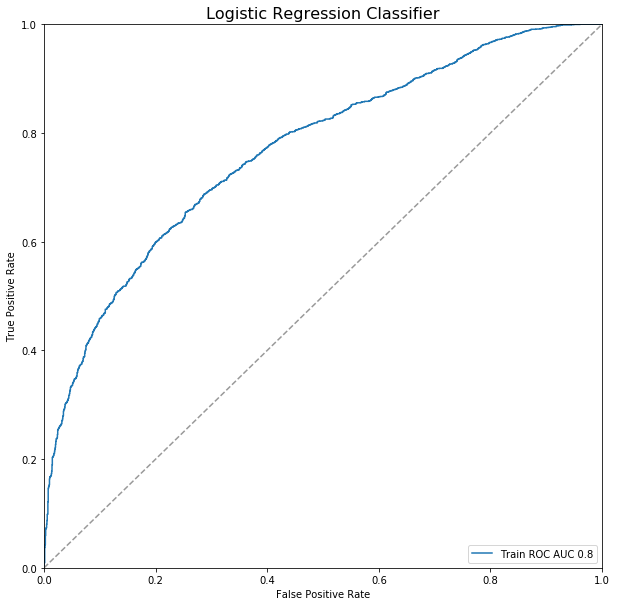

In [81]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [82]:
import xgboost

In [83]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [84]:
#X_train_hw = X_train_hw.loc[:,~X_train_hw.columns.duplicated()]

In [85]:
#len(y_train_hw)

In [92]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
# xgb = DecisionTreeClassifier()
xgb.fit(X_train_hw, y_train_hw)
y_train_predict = xgb.predict_proba(X_train_hw)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train_hw, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  1.0


In [ ]:
# не может же быть 1.0.. видимо, некорректно выбраны фичи

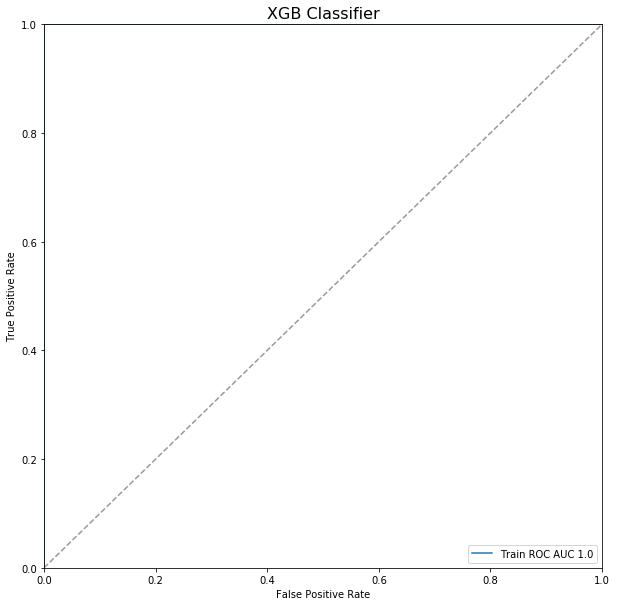

In [87]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

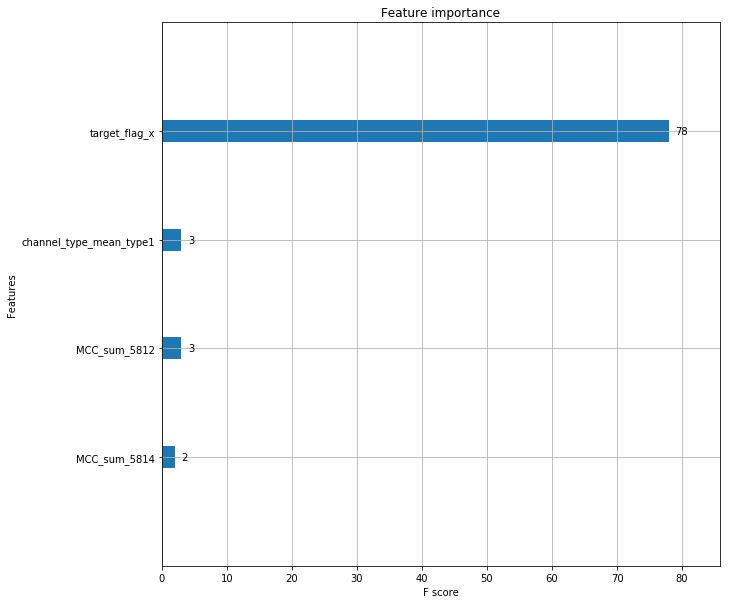

In [88]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
xgboost.plot_importance(booster=xgb)
plt.savefig('tree_importance_test1.png')